In [29]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [30]:
# Generate 2D independent variables which uniformly distributed between (-3, +3)
X = np.random.random((1000, 2)) * 6 - 3
# Calculate the outcome due to the function mentioned below
y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

The function:
$$ y = \cos(2x_1) + cos(3x_2) $$

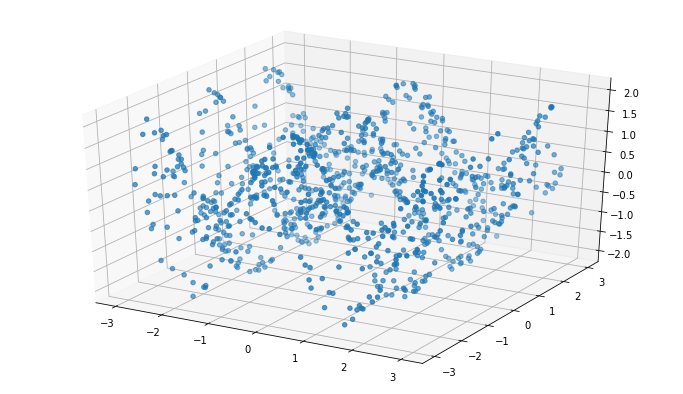

In [31]:
# Plot the data
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)
plt.show()

In [32]:
# Build our model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [33]:
# Summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile and Fit
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mse')
history = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0735
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9567
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9564
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9148
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8818
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8897
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8194
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7344
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7117
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6626
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6494
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6433
Epoch 13/100
32/32 [=================

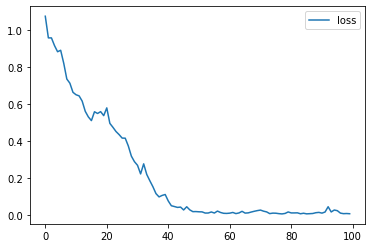

In [35]:
# Plot the loss
plt.plot(history.history['loss'], label='loss')
plt.legend()

(2500, 2)


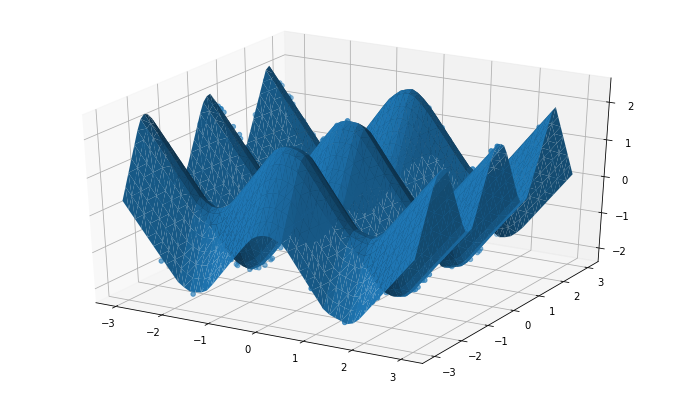

In [36]:
# Plot the data
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# Plot the predicted surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
print(Xgrid.shape)

# Prediction
y_hat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], y_hat, linewidth=0.2, antialiased=True)
plt.show()

# Can it extrapolate?


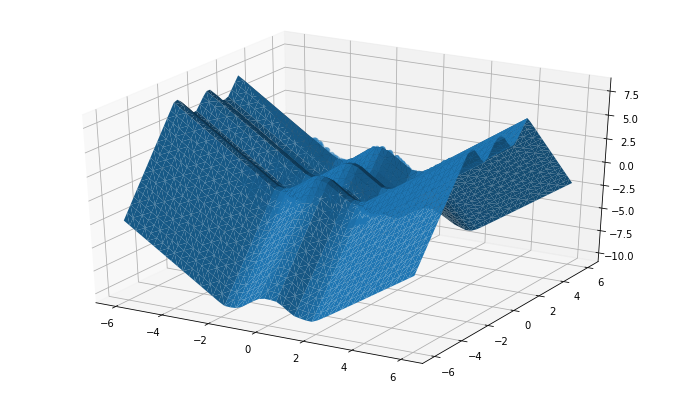

In [37]:
# Plot the data
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# Plot the predicted surface
line = np.linspace(-6, 6, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T

# Prediction
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()